
Sourav Ranjan Pradhan

Code Clause Data Science Internship

2.Market Basket Analysis in Python


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CodeClause Project/data.csv', encoding="ISO-8859-1")

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
df.Country.value_counts().head(5)

United Kingdom    495478
Germany             9495
France              8557
EIRE                8196
Spain               2533
Name: Country, dtype: int64

In [ ]:
df = df[df.Country == 'France']

In [ ]:
df['Description'] = df['Description'].str.strip()

In [ ]:
df[df.Country == 'France'].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/2010 8:45,3.75,12583.0,France
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/2010 8:45,3.75,12583.0,France
28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/2010 8:45,3.75,12583.0,France
29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/2010 8:45,0.85,12583.0,France
30,536370,21883,STARS GIFT TAPE,24,12/1/2010 8:45,0.65,12583.0,France
31,536370,10002,INFLATABLE POLITICAL GLOBE,48,12/1/2010 8:45,0.85,12583.0,France
32,536370,21791,VINTAGE HEADS AND TAILS CARD GAME,24,12/1/2010 8:45,1.25,12583.0,France
33,536370,21035,SET/2 RED RETROSPOT TEA TOWELS,18,12/1/2010 8:45,2.95,12583.0,France
34,536370,22326,ROUND SNACK BOXES SET OF4 WOODLAND,24,12/1/2010 8:45,2.95,12583.0,France
35,536370,22629,SPACEBOY LUNCH BOX,24,12/1/2010 8:45,1.95,12583.0,France


In [ ]:
basket = pd.pivot_table(data=df,index='InvoiceNo',columns='Description',values='Quantity', \
                        aggfunc='sum',fill_value=0)

In [ ]:
basket.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
basket['ALARM CLOCK BAKELIKE RED'].head(10)

InvoiceNo
536370    24
536852     0
536974     0
537065     4
537463     0
537468     0
537693     0
537897     0
537967     0
538008     0
Name: ALARM CLOCK BAKELIKE RED, dtype: int64

In [ ]:
def convert_into_binary(x):
    if x > 0:
        return 1
    else:
        return 0

In [ ]:
basket_sets = basket.applymap(convert_into_binary)

In [ ]:
basket_sets['ALARM CLOCK BAKELIKE RED'].head()

InvoiceNo
536370    1
536852    0
536974    0
537065    1
537463    0
Name: ALARM CLOCK BAKELIKE RED, dtype: int64

In [ ]:
basket_sets.drop(columns=['POSTAGE'],inplace=True)

In [ ]:
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)

In [ ]:
frequent_itemsets

,support,itemsets
0,0.082430,(ALARM CLOCK BAKELIKE GREEN)
1,0.086768,(ALARM CLOCK BAKELIKE PINK)
2,0.080260,(ALARM CLOCK BAKELIKE RED)
3,0.084599,(DOLLY GIRL LUNCH BOX)
4,0.082430,(JUMBO BAG RED RETROSPOT)
5,0.106291,(LUNCH BAG APPLE DESIGN)
6,0.071584,(LUNCH BAG DOLLY GIRL DESIGN)
7,0.130152,(LUNCH BAG RED RETROSPOT)
8,0.101952,(LUNCH BAG SPACEBOY DESIGN)
9,0.099783,(LUNCH BAG WOODLAND)


In [ ]:
rules_mlxtend = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules_mlxtend.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(PLASTERS IN TIN CIRCUS PARADE),(PLASTERS IN TIN SPACEBOY),0.143167,0.117137,0.075922,0.530303,4.527217,0.059152,1.879645
1,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN CIRCUS PARADE),0.117137,0.143167,0.075922,0.648148,4.527217,0.059152,2.435209
2,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN CIRCUS PARADE),0.145336,0.143167,0.086768,0.597015,4.170059,0.065961,2.126215
3,(PLASTERS IN TIN CIRCUS PARADE),(PLASTERS IN TIN WOODLAND ANIMALS),0.143167,0.145336,0.086768,0.606061,4.170059,0.065961,2.169531
4,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN SPACEBOY),0.145336,0.117137,0.088937,0.611940,5.224157,0.071913,2.275071


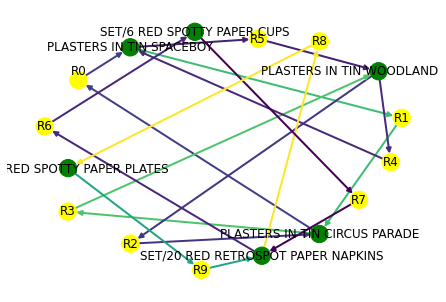

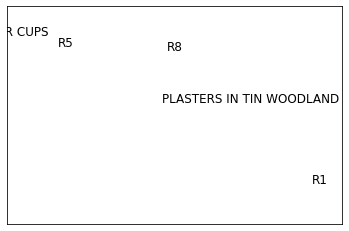

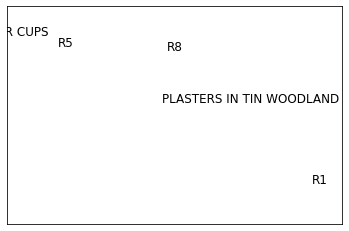

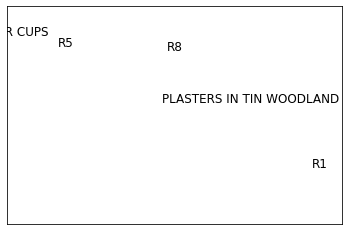

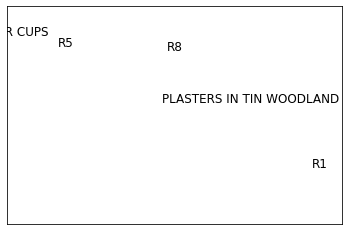

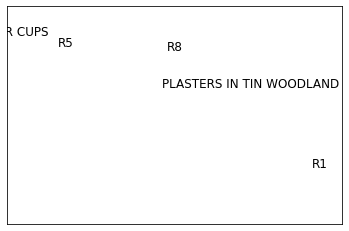

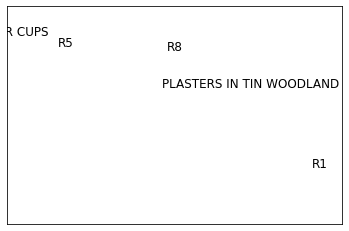

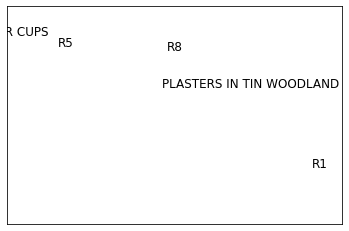

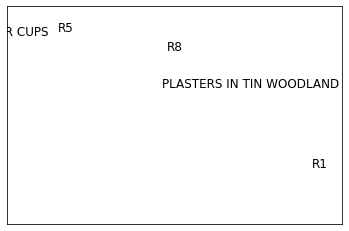

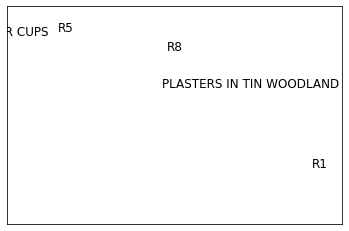

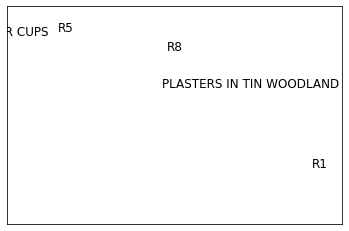

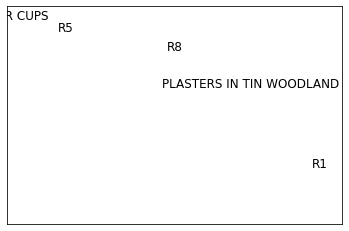

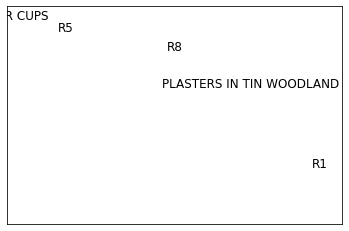

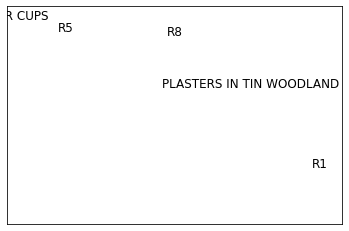

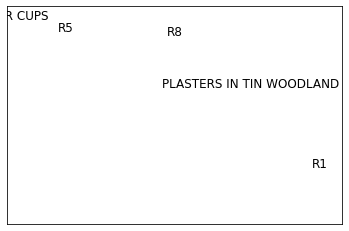

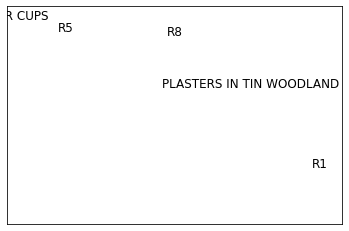

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt  

def draw_graph(rules, rules_to_show):
    G1 = nx.DiGraph()
    color_map=[]
    N = 50
    colors = np.random.rand(N)    
    strs=['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']

    for i in range(rules_to_show):
        G1.add_nodes_from(["R"+str(i)])
        for a in rules.iloc[i]['antecedents']:
            G1.add_nodes_from([a])
            G1.add_edge(a, "R"+str(i), color=colors[i] , weight = 2)
        for c in rules.iloc[i]['consequents']:
            G1.add_nodes_from([c])
            G1.add_edge("R"+str(i), c, color=colors[i],  weight=2)

    for node in G1:
        found_a_string = False
        for item in strs: 
            if node==item:
                found_a_string = True
        if found_a_string:
            color_map.append('yellow')
        else:
            color_map.append('green')       

    edges = G1.edges()
    colors = [G1[u][v]['color'] for u,v in edges]
    weights = [G1[u][v]['weight'] for u,v in edges]

    pos = nx.spring_layout(G1, k=16, scale=1)
    nx.draw(G1, pos, node_color = color_map, edge_color=colors, width=weights, font_size=16, 
            with_labels=False)            

    for p in pos:  # raise text positions
        pos[p][1] += 0.07
        nx.draw_networkx_labels(G1, pos)
        plt.show()

draw_graph (rules_mlxtend, 10) 